In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('D://code//data//data_SA_north//Taian.csv', low_memory=False)

In [3]:
df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)

In [4]:
df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)

In [5]:
df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)

In [6]:
df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)

In [9]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
directions = ['N', 'S']
days = [21, 22, 23, 24, 25, 26, 27]
categories = [31, 32, 41, 42, 5]
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
small_car = [31, 32]
big_car = [42, 5]
big_41 = [41]
n_cats = [small_car, big_41, big_car]


In [10]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
col_min = []
for i in hours:
    for j in enumerate(start_min):
        string = "{0}:{1}-{0}:{2}".format(i, j[1], end_min[j[0]])
        col_min.append(string)
        #print(string)

In [7]:
def cars_amount_stD_Day(df, days, stop_col):
    #days = [12, 13, 14, 15, 16, 17, 18]
    categories = [31, 32, 41, 42, 5]
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    start_min = [0, 11, 21, 31, 41, 51]
    end_min = [10, 20, 30, 40, 50, 59]
    directions = ['N', 'S']
    result_dicts = {}

    for day in days :
        

        for dire in directions:
            list_31 = []
            list_32 = []
            list_41 = []
            list_42 = []
            list_5 = []

            for category in categories :
                for hour in hours :
                    for num in enumerate(start_min):
                        cnt_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])].shape[0]
                        stD_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])]['STOP_DURATION'].mean()
                        #string = "{0}:{1}-{0}:{2}".format(hour, num[1], end_min[num[0]])
                        if category == 31 :
                            list_31.append(cnt_var)
                            list_31.append(stD_var)
                            #list_31.append(cnt_var)
                            #list_31.append(per_var)
                        elif category == 32 :
                            list_32.append(cnt_var)
                            list_32.append(stD_var)
                            #list_32.append(cnt_var)
                            #list_32.append(per_var)
                        elif category == 41 :
                            list_41.append(cnt_var)
                            list_41.append(stD_var)
                            #list_41.append(cnt_var)
                            #list_41.append(per_var)
                        elif category == 42 :
                            list_42.append(cnt_var)
                            list_42.append(stD_var)
                            #list_42.append(cnt_var)
                            #list_42.append(per_var)
                        elif category == 5 :
                            list_5.append(cnt_var)
                            list_5.append(stD_var)
                            #list_5.append(cnt_var)
                            #list_5.append(per_var)

            iterables = [col_min, ['cnt', 'stD']]
            col = pd.MultiIndex.from_product(iterables)
            result_dicts["min_df_{1}_{0}".format(day, dire)] = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)                
    return result_dicts
            
            

In [11]:
result_dict = cars_amount_stD_Day(df, days, "STOP")

In [12]:
result_dict.keys() 

dict_keys(['min_df_N_21', 'min_df_S_21', 'min_df_N_22', 'min_df_S_22', 'min_df_N_23', 'min_df_S_23', 'min_df_N_24', 'min_df_S_24', 'min_df_N_25', 'min_df_S_25', 'min_df_N_26', 'min_df_S_26', 'min_df_N_27', 'min_df_S_27'])

In [15]:
def drawing_stD_cnt_perDay(df, day, direction, col_min):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # direction is already set in df(result_dict.keys_name), and the form in the dataframe is the same, no matter wich directions
    XX = col_min
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    categories = ['31', '32', '41', '42', '5']
    fig, ax1 = plt.subplots(1,1,figsize=(16, 5))
    variables = {}
    N=144
    bottom = np.zeros(N)
    ax2 = ax1.twinx()
        
    for idx, cat in enumerate(categories):
        data = []
        variables["{1}_in_{0}".format(cat, direction)] = np.array([df.iloc[idx, :][x] for x in range(0, 288, 2)])
        variables["{1}_{0}_stD".format(cat, direction)] = np.array([df.iloc[idx, :][x] for x in range(1, 288, 2)])
        data.append(variables["{1}_in_{0}".format(cat, direction)])
                
        for elem in data:
            ax1.bar(XX, variables["{1}_in_{0}".format(cat, direction)], label='{0}_{1}'.format(cat, direction), alpha = 0.4, bottom = bottom)
            bottom += elem
        
        pd.Series(variables["{1}_{0}_stD".format(cat, direction)]).fillna(0).plot(linewidth = 1.2, label='{0}_{1}_stD'.format(cat, direction))
        #ax2.plot(XX,variables["{1}_{0}_stD".format(cat, direction)], label='{0}_{1}_stD'.format(cat, direction))
    
    label = []
    for hour in hours:
        xticks_label = "{0}:00".format(hour)
        label.append(xticks_label)
    
    ax1.set_xticks([col_min[i] for i in range(0, 144, 6)])
    ax1.set_xticklabels(label)
    
    
    ax1.set_ylabel('amount of cars')
    ax1.set_xlabel('duration of minutes')


    #plt.xticks(rotation=90)
    ax1.legend()

    

    ax2.legend(loc=4)
    #ax2.set_ylim(15, 30)
    ax2.set_ylabel('average stop duration (minutes)')
    ax2.set_xlabel('minutes duration')

    
    ax2.margins(0.015625)    
    #ax2.set_xticks(['0:0-0:10', '1:0-1:10'])
    #ax2.set_xticklabels(['0:00', '1:00'])

    plt.grid()
    plt.title('Stopped numbers of cars with stop duration in {0} -direction {1}'.format(day, direction))
    plt.tight_layout()
    plt.show()

    fig.savefig('D://code//graph//{0}_{1}_stD_cnt.png'.format(day, direction))

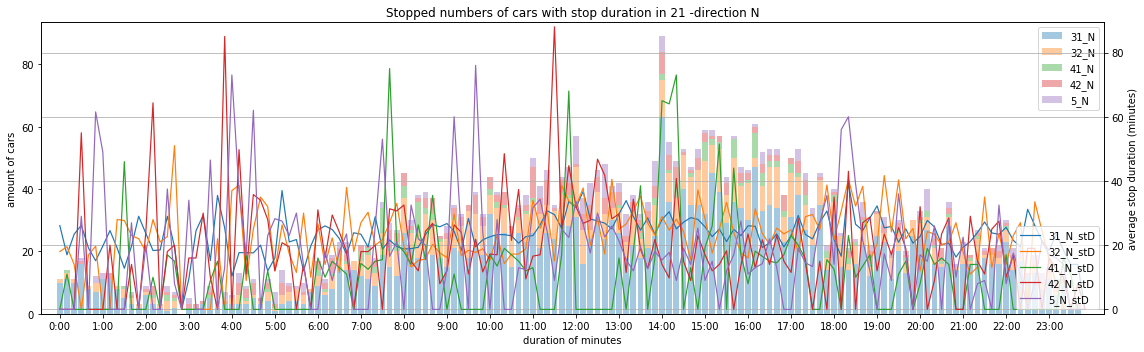

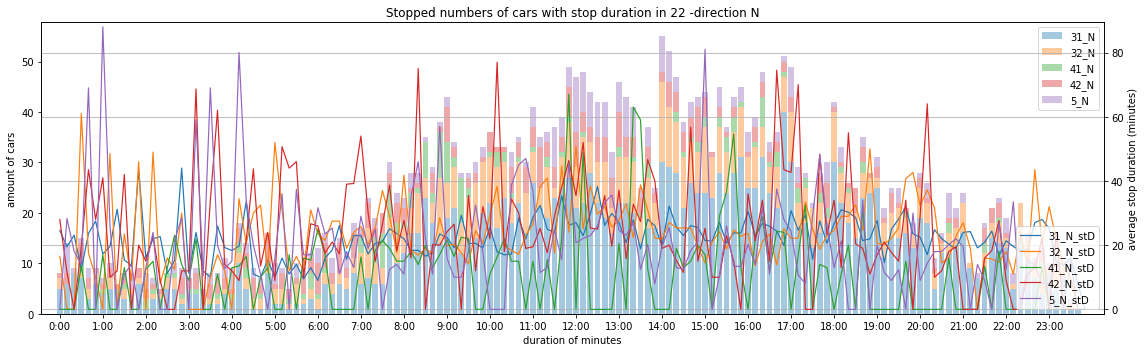

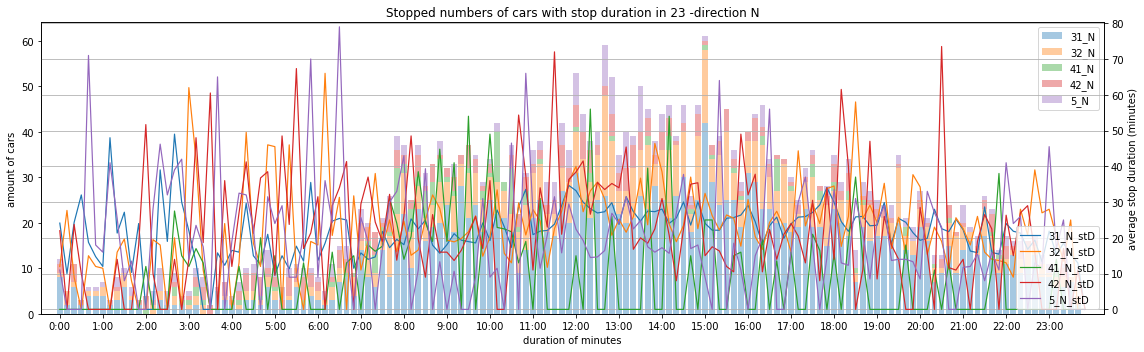

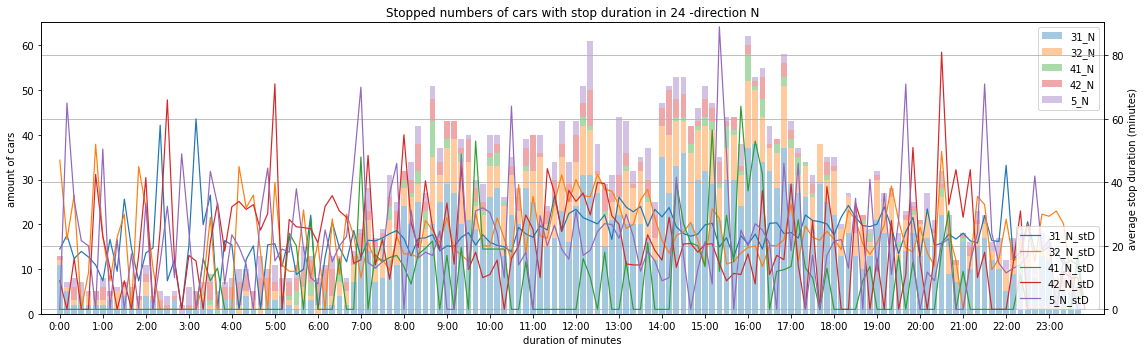

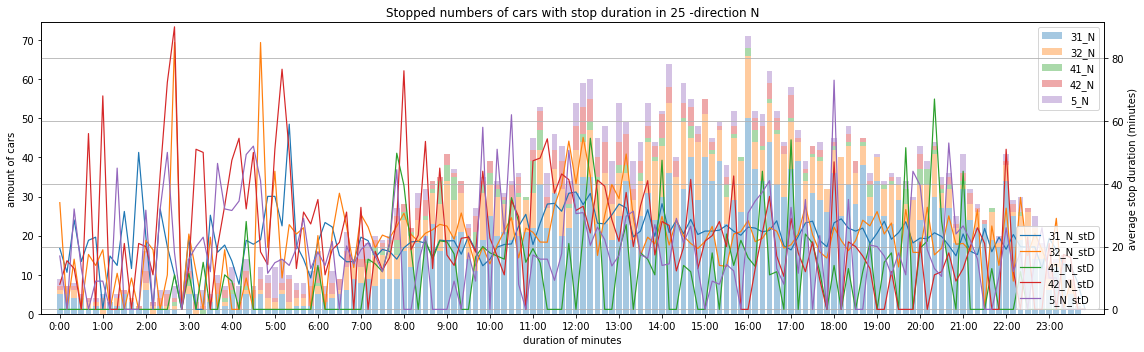

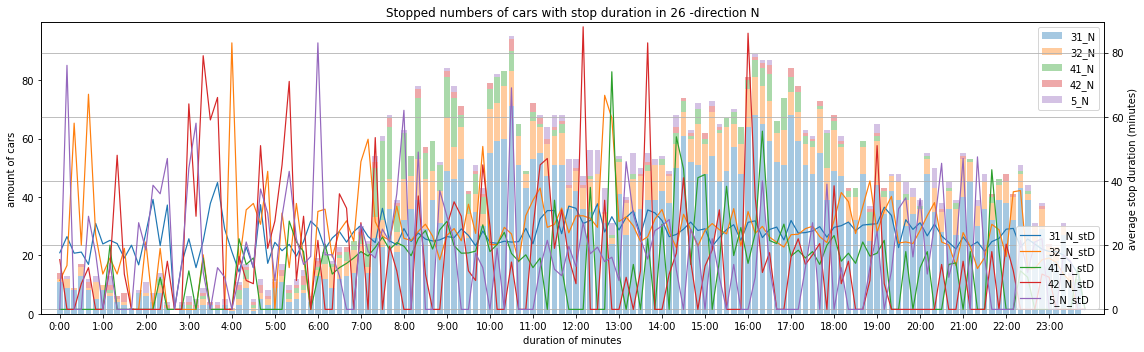

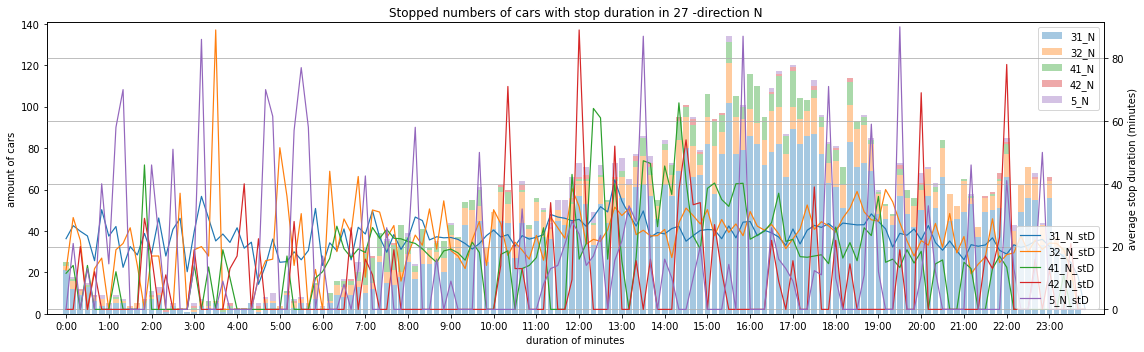

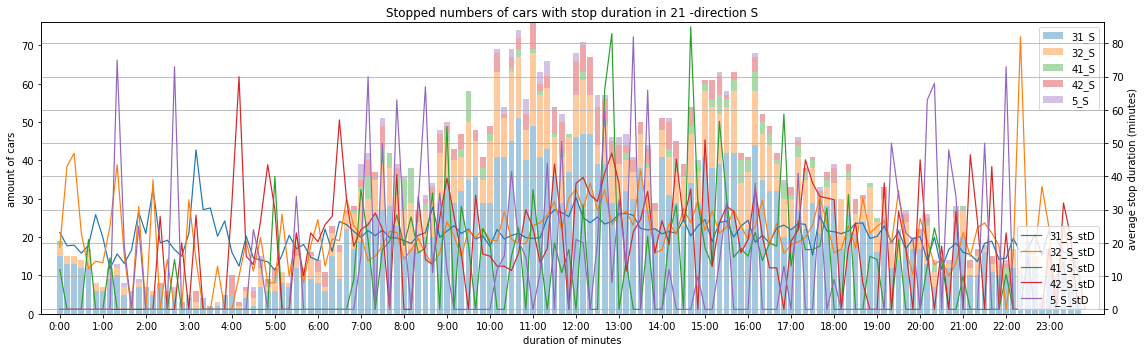

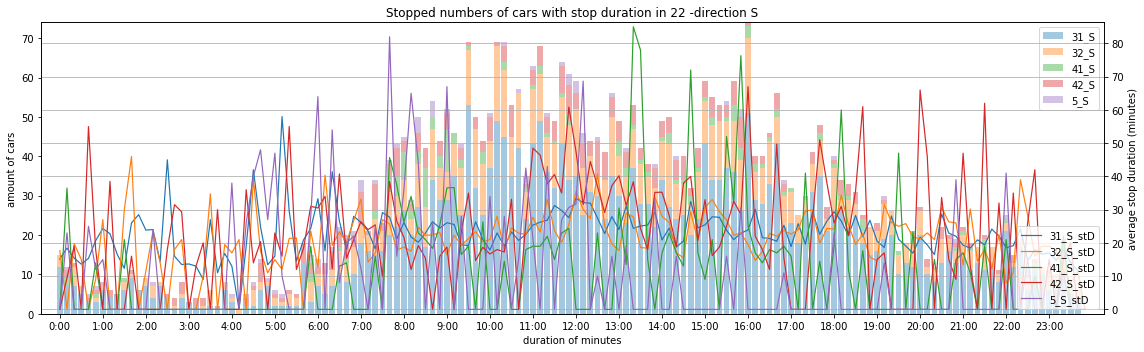

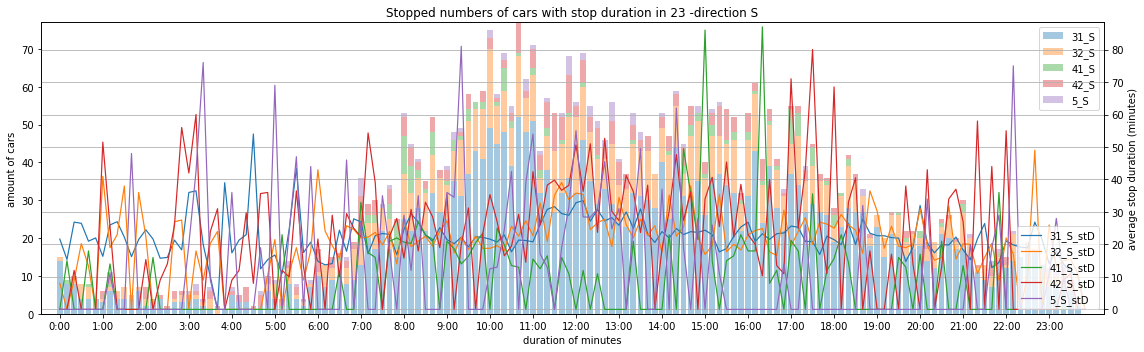

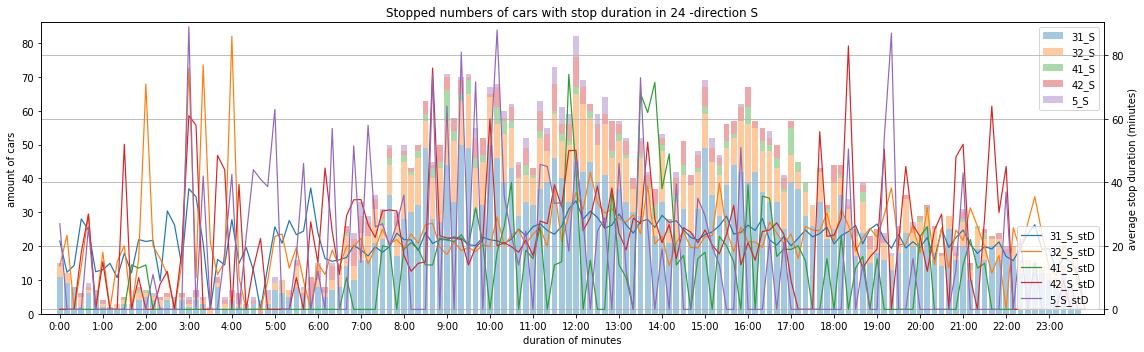

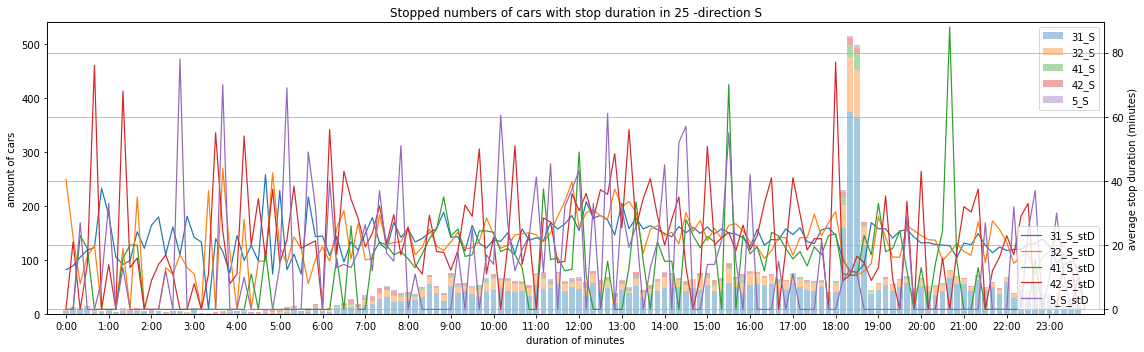

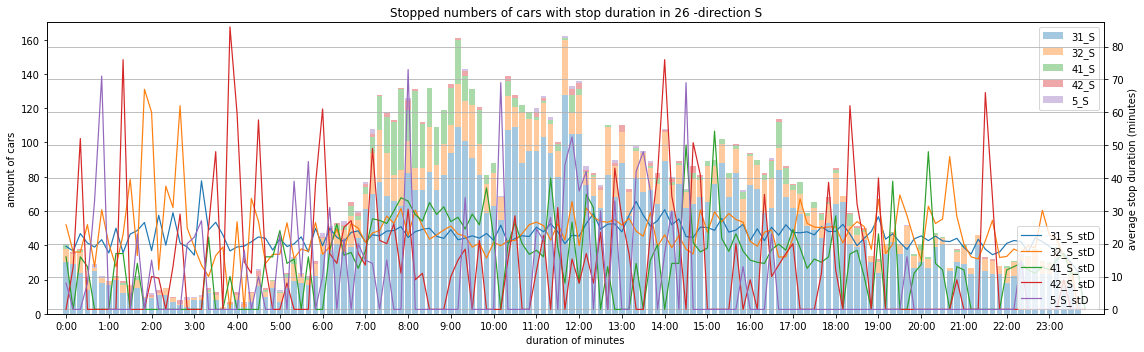

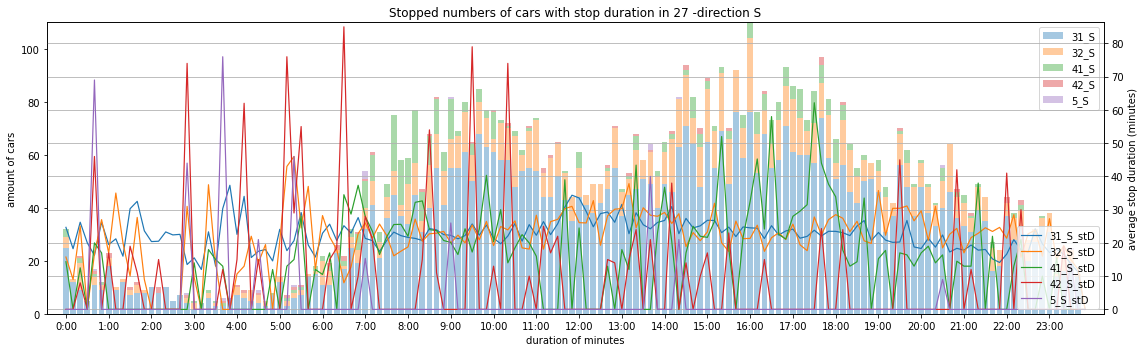

In [16]:
for dire in directions :
    for day in days :
        drawing_stD_cnt_perDay(result_dict["min_df_{0}_{1}".format(dire, day)], day, dire, col_min)